# Hotel Reservation Data Analysis  
### Understanding Booking Trends and Customer Behavior 
In this project, I analyze a dataset of hotel reservations to uncover patterns in booking behavior, cancellation rates, seasonal trends, and factors influencing customer decisions.  


In [5]:
import pandas as pd

Import the reservation data

In [23]:
data = pd.read_csv('Hotel Bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Replace the columns "company", "children" and "agent" Nan values with "0"
Change "float" data-types which do not have decimal part to "int" data-type

In [7]:
data['company'] = data['company'].fillna(0)

data['company'] = data['company'].astype(int)

data['children'] = data['children'].fillna(0)
data['children'] = data['children'].astype(int)

data['agent'] = data['agent'].fillna(0)

data = data.drop_duplicates()

In [8]:
import matplotlib.pyplot as plt

This plot shows the number of total reservations in every hotel.
The City Hotel is booked 1.57 times more than Resort Hotel.

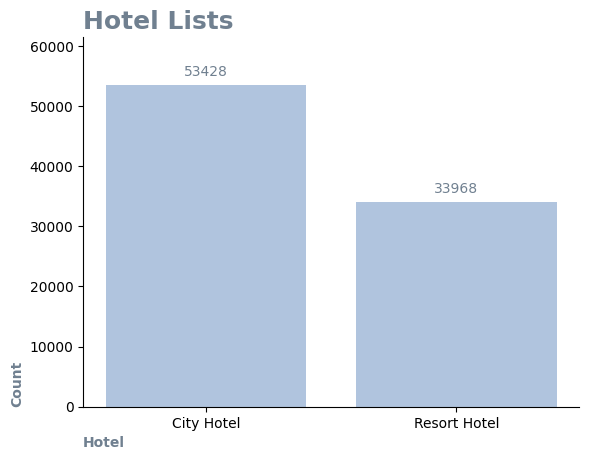

In [9]:
fig, ax = plt.subplots()
hotel_types = data['hotel'].value_counts()
plt.bar(hotel_types.index, hotel_types.values, color='lightsteelblue')
# set value written on each bar
for i, value in enumerate(hotel_types.values):
    plt.text(i, value + (0.03 * max(hotel_types.values)), str(value), ha='center', fontsize=10, color='slategray')
# increase y limit
plt.ylim(0, max(hotel_types.values) * 1.15)

# Customize spines to make top and right lines invisible
ax = plt.gca()  # Get current axis

ax.spines[['top', 'right']].set_visible(False)

plt.title('Hotel Lists', loc='left', weight="bold", color='slategray', fontsize=18)
plt.xlabel('Hotel', loc='left', weight="bold", color='slategray')
plt.ylabel('Count', loc='bottom', weight="bold", color='slategray')
plt.show()

In this plot we can see what percentage of reservations are cancelled.
About 27.5 percent of the total reservations are cancelled.

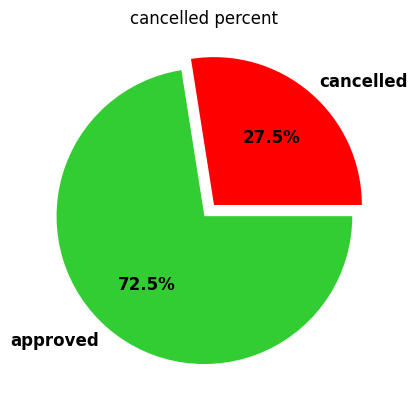

In [10]:
cancelled = data[data['is_canceled'] == 1].shape[0]
not_cancelled = data[data['is_canceled'] == 0].shape[0]
explode = [0.1, 0]
plt.pie([cancelled, not_cancelled], labels=['cancelled', 'approved'], explode=explode, colors=['red', 'limegreen'],
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        autopct='%1.1f%%')
plt.title("cancelled percent")
plt.show()

As we can see, the number of canceled reservations in City Hotel is more than the same number in Resort Hotel.

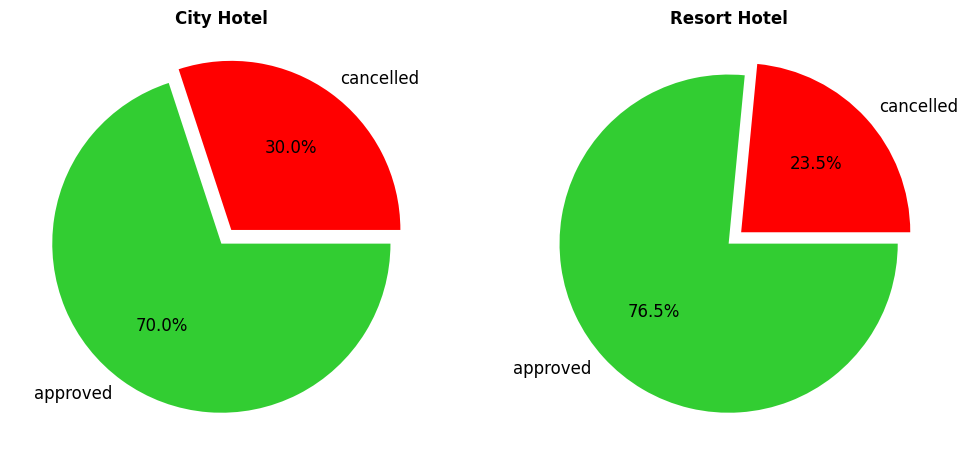

In [11]:
city_hotel_canceled = data.loc[(data['is_canceled'] == 1) & (data['hotel'] == 'City Hotel')]
city_hotel_approved = data.loc[(data['is_canceled'] == 0) & (data['hotel'] == 'City Hotel')]

resort_hotel_canceled = data.loc[(data['is_canceled'] == 1) & (data['hotel'] == 'Resort Hotel')]
resort_hotel_approved = data.loc[(data['is_canceled'] == 0) & (data['hotel'] == 'Resort Hotel')]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie([city_hotel_canceled.shape[0], city_hotel_approved.shape[0]], labels=['cancelled', 'approved'],
            explode=explode,
            colors=['red', 'limegreen'], textprops={'fontsize': 12},
            autopct='%1.1f%%')
axes[0].set_title('City Hotel', fontweight='bold')

axes[1].pie([resort_hotel_canceled.shape[0], resort_hotel_approved.shape[0]], labels=['cancelled', 'approved'],
            explode=explode,
            colors=['red', 'limegreen'], textprops={'fontsize': 12},
            autopct='%1.1f%%')
axes[1].set_title('Resort Hotel', fontweight='bold')

plt.show()

In [12]:
import numpy as np
import matplotlib.gridspec as gridspec

In this plot, the reservations are disguised.
In the first row, the number of reservations per year is compared between two hotels. We can understand that in first year both hotels had almost no reservations.
Then in the second year both hotels had growth in number of reservations, Resort hotel with 200 reservations more than City hotel. But after second year the growth of City hotel in reservations is more than Resort hotel.

In second row we can which type of rooms were booked most in each hotel. As it is recognizable, in both hotels, the type A is booked most and type D after it.


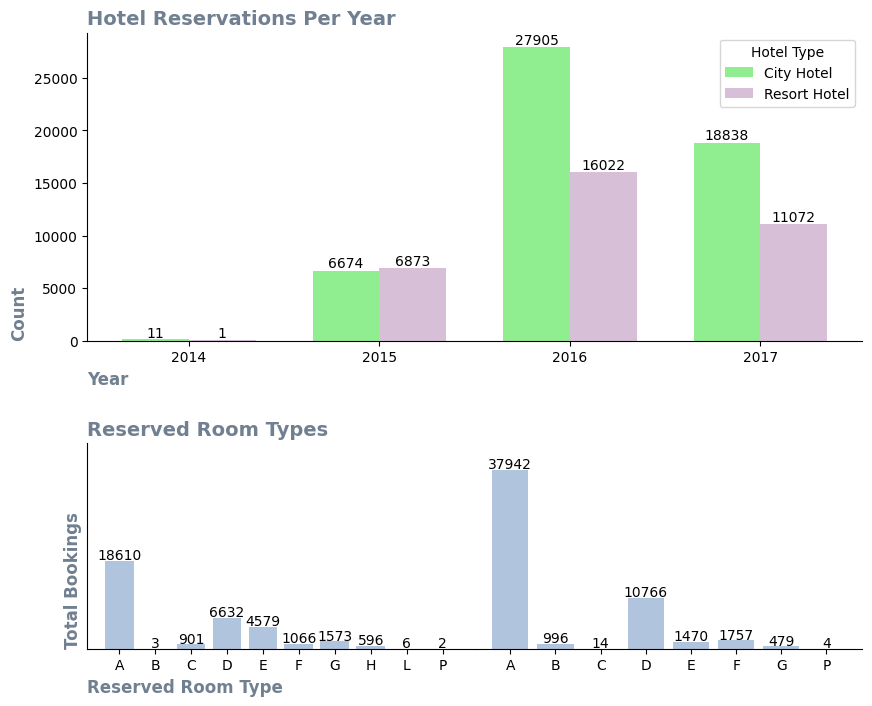

In [13]:
# First Row

# extract reservation year
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_year'] = data['reservation_status_date'].dt.year

Fig = plt.figure(figsize=(10, 8))
grid = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1])

reservation_counts = data.groupby(["reservation_year", "hotel"]).size().reset_index(name="count")

# Pivot the data to get separate columns for each hotel type
pivot_df = reservation_counts.pivot(index="reservation_year", columns="hotel", values="count")

# Extract years and reservation counts
years = pivot_df.index.astype(str)  # Convert years to string for labels
city_hotel_reservations = pivot_df["City Hotel"].values
resort_hotel_reservations = pivot_df["Resort Hotel"].values

x = np.arange(len(years))  # x positions for the bars
width = 0.35

ax1 = plt.subplot(grid[0, :])

bars1 = ax1.bar(x - width / 2, city_hotel_reservations, width, label='City Hotel', color='lightgreen')
bars2 = ax1.bar(x + width / 2, resort_hotel_reservations, width, label='Resort Hotel', color='thistle')

# Add count on each bar
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}',
             ha='center', va='bottom', fontsize=10)

for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}',
             ha='center', va='bottom', fontsize=10)

# show too little reservations on plot
for bar in ax1.patches:
    if bar.get_height() < 5:
        bar.set_height(100)
    elif bar.get_height() < 15:
        bar.set_height(200)

ax1.spines[['top', 'right']].set_visible(False)

# Labels and Title
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel("Year", loc='left', fontsize=12, weight="bold", color='slategray')
ax1.set_ylabel("Count", loc='bottom', fontsize=12, weight="bold", color='slategray')
ax1.set_title("Hotel Reservations Per Year", weight="bold", fontsize=14, loc='left', color='slategray')
ax1.legend(title="Hotel Type")

# Second Row

# rooms types
room_types = data['reserved_room_type'].unique()
room_types_num = np.arange(len(room_types))

# extract each hotel reservations for each room type
resort = data[data['hotel'] == 'Resort Hotel']
resort_rooms = (resort.groupby('reserved_room_type').size()).reset_index()
resort_rooms.columns = ['Room Type', 'Count']

city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel_rooms = (city_hotel.groupby('reserved_room_type').size()).reset_index()
city_hotel_rooms.columns = ['Room Type', 'Count']

# second plot
ax2 = plt.subplot(grid[1, 0])

ax2_bars = ax2.bar(resort_rooms['Room Type'], resort_rooms['Count'], color='steelblue')

plt.ylim(0, max(resort_rooms['Count']) * 1.15)

# Add count on each bar
for bar in ax2_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 300,
             str(height), ha='center', fontsize=10, color='black')

ax2.spines[['top', 'right']].set_visible(False)

# Labels and Title
plt.bar(resort_rooms['Room Type'], resort_rooms['Count'], color='lightsteelblue')
plt.xlabel("Reserved Room Type", loc='left', fontsize=12, color='slategray', weight="bold")
plt.ylabel("Total Bookings", loc='bottom', fontsize=12, color='slategray', weight="bold")
plt.title("Reserved Room Types", weight="bold", fontsize=14, loc='left', color='slategray')
plt.xticks(rotation=0)

# third plot
ax3 = plt.subplot(grid[1, 1], sharey=ax2)
ax3_bars = ax3.bar(city_hotel_rooms['Room Type'], city_hotel_rooms['Count'], color='steelblue', width=0.5)

# increase height of plot
plt.ylim(0, max(city_hotel_rooms['Count']) * 1.15)

# Adding count on each bar
for bar in ax3_bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2, height + 300,
             str(height), ha='center', fontsize=10, color='black')

ax3.spines[['top', 'left', 'right']].set_visible(False)

# Labels and Title
plt.bar(city_hotel_rooms['Room Type'], city_hotel_rooms['Count'], color='lightsteelblue')
ax3.set_yticks([])
plt.xticks(rotation=0)

# adjust spacing
plt.subplots_adjust(hspace=0.4, wspace=0)

plt.show()

Here, we can understand the revenue earned in each Hotels.
As we can see in the first row, in the first year Resort hotel has no revenue but City hotel has about 11,000 Dollars revenue. After first year both hotels have growth in income, City hotel more than Resort Hotel.

In room types section, we can see for both hotels room type A has had the most benefit and type D the most after it.

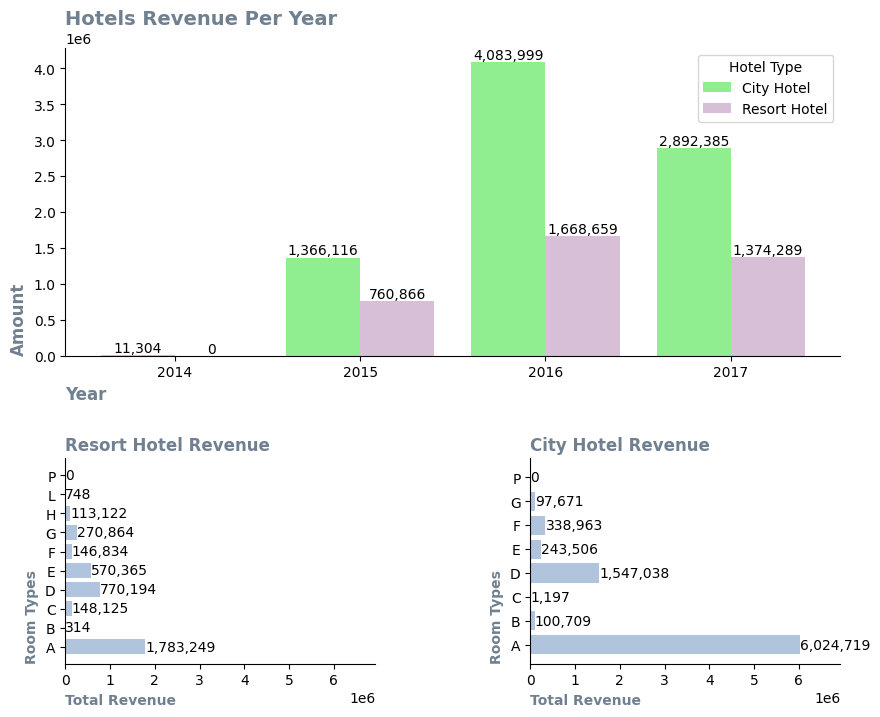

In [27]:
# extract reservation year
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_year'] = data['reservation_status_date'].dt.year

reservation_counts = data.groupby(["reservation_year", "hotel"]).size().reset_index(name="count")

# Pivot the data to get separate columns for each hotel type
pivot_df = reservation_counts.pivot(index="reservation_year", columns="hotel", values="count")

# Extract years and reservation counts
years = pivot_df.index.astype(str)  # Convert years to string for labels
city_hotel_reservations = pivot_df["City Hotel"].values
resort_hotel_reservations = pivot_df["Resort Hotel"].values

x = np.arange(len(years))  # x positions for the bars
width = 0.45

# First Row
Fig = plt.figure(figsize=(10, 8))
grid = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1])

# Extract years and reservation counts

city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel_adr = city_hotel.groupby('reservation_year')['adr'].sum().reset_index()
city_hotel_adr.columns = ['Year', 'adr']  # Removed extra brackets

resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel_adr = resort_hotel.groupby('reservation_year')['adr'].sum().reset_index()
resort_hotel_adr.columns = ['Year', 'adr']  # Removed extra brackets

ax1 = plt.subplot(grid[0, :])

# Ensure x values match the years
x = city_hotel_adr['Year']

# Bar plot
width = 0.4  # Adjust width for spacing
bars1 = ax1.bar(x - width / 2, city_hotel_adr['adr'], width, label='City Hotel', color='lightgreen')
bars2 = ax1.bar(x + width / 2, resort_hotel_adr['adr'], width, label='Resort Hotel', color='thistle')

# Add count on each bar with thousands separator
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}',  # Format with comma separator
             ha='center', va='bottom', fontsize=10)

# Add count on each bar with thousands separator
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}',  # Format with comma separator
             ha='center', va='bottom', fontsize=10)

# show too little reservations on plot
for bar in ax1.patches:
    if bar.get_height() == 690.8:
        bar.set_height(20000)

ax1.spines[['top', 'right']].set_visible(False)

# Labels and Title
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel("Year", loc='left', fontsize=12, weight="bold", color='slategray')
ax1.set_ylabel("Amount", loc='bottom', fontsize=12, weight="bold", color='slategray')
ax1.set_title("Hotels Revenue Per Year", weight="bold", fontsize=14, loc='left', color='slategray')
ax1.legend(title="Hotel Type")

# Second Row
city_hotel_adr = city_hotel.groupby('reservation_year')['adr'].sum().reset_index()

# rooms types
room_types = data['reserved_room_type'].unique()
room_types_num = np.arange(len(room_types))

# extract each hotel reservations for each room type
resort_hotel_rooms = (resort_hotel.groupby('reserved_room_type')['adr'].sum()).reset_index()
resort_hotel_rooms.columns = ['Room Type', 'Count']

city_hotel_rooms = (city_hotel.groupby('reserved_room_type')['adr'].sum()).reset_index()
city_hotel_rooms.columns = ['Room Type', 'Count']

# Second Row (Horizontal Bar Chart)

# second plot
ax2 = plt.subplot(grid[1, 0])

# Create horizontal bars
ax2_bars = ax2.barh(resort_hotel_rooms['Room Type'], resort_hotel_rooms['Count'], color='steelblue')

plt.xlim(0, max(resort_hotel_rooms['Count']) * 1.15)  # Adjust limit for better spacing

# Add count on each bar
for bar in ax2_bars:
    width = bar.get_width()  # Get the length of the bar
    ax2.text(width + 300, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', ha='left', va='center', fontsize=10, color='black')

# show too little reservations on plot
for bar in ax2.patches:
    if 0 < bar.get_width() < 800:
        bar.set_width(8000)

ax2.spines[['top', 'right']].set_visible(False)

# Labels and Title (Updated for Horizontal Bars)
plt.barh(resort_hotel_rooms['Room Type'], resort_hotel_rooms['Count'], color='lightsteelblue')
plt.ylabel("Room Types", loc='bottom', fontsize=10, color='slategray', weight="bold")
plt.xlabel("Total Revenue", loc='left', fontsize=10, color='slategray', weight="bold")
plt.title("Resort Hotel Revenue", weight="bold", fontsize=12, loc='left', color='slategray')
plt.yticks(rotation=0)

# third plot
ax3 = plt.subplot(grid[1, 1], sharex=ax2)

# Create horizontal bars
ax3_bars = ax3.barh(city_hotel_rooms['Room Type'], city_hotel_rooms['Count'], color='steelblue')

plt.xlim(0, max(city_hotel_rooms['Count']) * 1.15)

# Add count on each bar
for barr in ax3_bars:
    width = barr.get_width()  # Get the length of the bar
    ax3.text(width + 300, barr.get_y() + barr.get_height() / 2,
             f'{width:,.0f}', ha='left', va='center', fontsize=10, color='black')

ax3.spines[['top', 'right']].set_visible(False)

# Labels and Title (Updated for Horizontal Bars)
plt.barh(city_hotel_rooms['Room Type'], city_hotel_rooms['Count'], color='lightsteelblue')
plt.ylabel("Room Types", loc='bottom', fontsize=10, color='slategray', weight="bold")
plt.xlabel("Total Revenue", loc='left', fontsize=10, color='slategray', weight="bold")
plt.title("City Hotel Revenue", weight="bold", fontsize=12, loc='left', color='slategray')
plt.yticks(rotation=0)  # No need to rotate since it's vertical now

# adjust spacing
plt.subplots_adjust(hspace=0.4, wspace=.5)
plt.show()

According to these two plots we can understand that although the minimum revenue of rooms, the mean and the standard deviation is almost same number in two hotels, but the City hotel has had much more large maximum revenue in it's reservations.

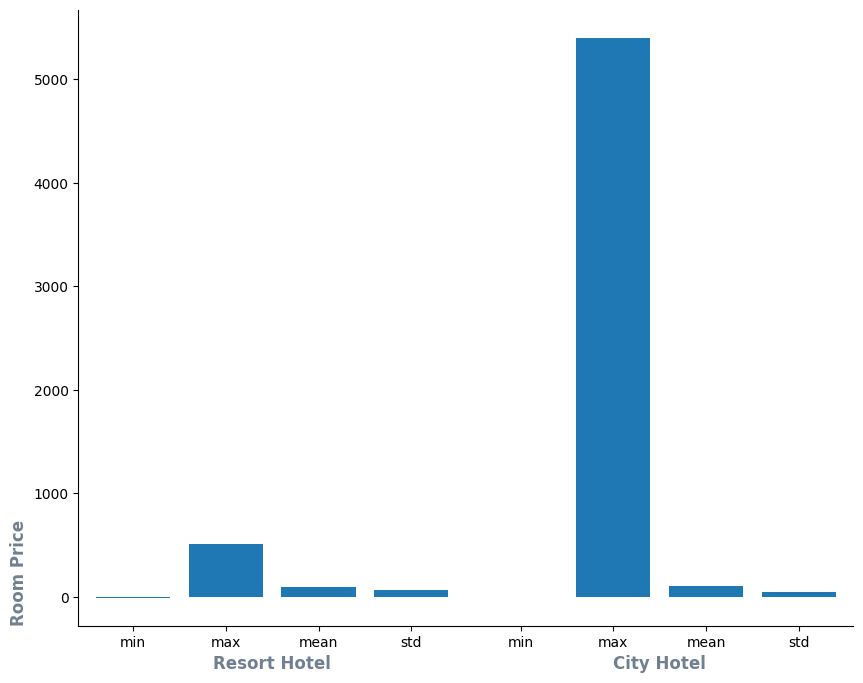

In [15]:
city_hotel = data[data['hotel'] == 'City Hotel']
resort_hotel = data[data['hotel'] == 'Resort Hotel']

resort_adr = resort_hotel['adr']
r_max = resort_adr.max()
r_min = resort_adr.min()
r_mean = resort_adr.mean()
r_std = resort_adr.std()
index = ['min', 'max', 'mean', 'std']
r_value = [r_min, r_max, r_mean, r_std]

city_adr = city_hotel['adr']
c_max = city_adr.max()
c_min = city_adr.min()
c_mean = city_adr.mean()
c_std = city_adr.std()
c_value = [c_min, c_max, c_mean, c_std]

Fig = plt.figure(figsize=(10, 8))
grid = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(grid[0, 0])
plt.bar(index, r_value)
plt.ylabel('Room Price', loc='bottom', fontsize=12, color='slategray', weight="bold")
plt.xlabel('Resort Hotel', loc='center', fontsize=12, color='slategray', weight="bold")
ax1.spines[['top', 'right']].set_visible(False)

ax2 = plt.subplot(grid[0, 1], sharey=ax1)
plt.bar(index, c_value)
plt.xlabel('City Hotel', loc='center', fontsize=12, color='slategray', weight="bold")

ax2.spines[['top', 'right', 'left']].set_visible(False)
ax2.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0)

plt.show()


According to this analyze, we see that Portugal had significantly higher amount of reservations.

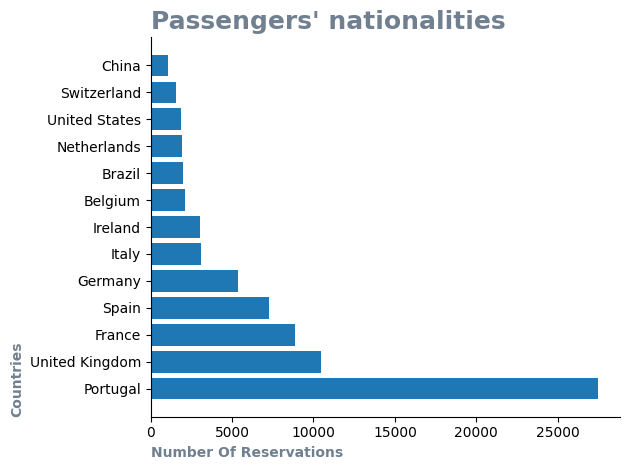

In [16]:
countries = ['China', 'Switzerland', 'United States', 'Netherlands', 'Brazil', 'Belgium', 'Ireland', 'Italy', 'Germany',
     'Spain', 'France', 'United Kingdom', 'Portugal']
countries = countries[::-1]
my_data = data.groupby(data['country']).size().reset_index()
my_data.columns = ['country', 'reservations']
my_data = my_data.sort_values(by='reservations', ascending=False).reset_index()
my_data.drop('index', axis=1, inplace=True)

target_reservations = my_data[my_data['reservations'] > 1000]
fig, ax = plt.subplots()

plt.barh(countries, target_reservations['reservations'])
plt.title('Passengers\' nationalities', loc='left', weight="bold", color='slategray', fontsize=18)
plt.xlabel('Number Of Reservations', loc='left', weight="bold", color='slategray')
plt.ylabel('Countries', loc='bottom', weight="bold", color='slategray')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Most of the reservations are for online travel agencies, more than all other market types. 

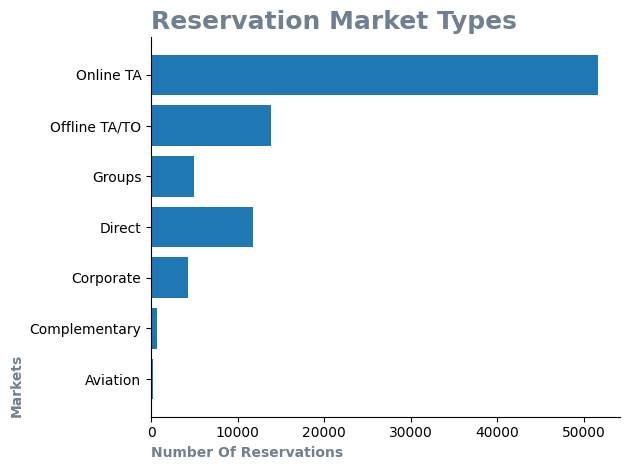

In [17]:
market_segments = data['market_segment'].unique()
my_data = data.groupby(data['market_segment']).size().reset_index()
my_data.columns = ['market_segment', 'count']
my_data.drop(7, axis=0, inplace=True)

fig, ax = plt.subplots()

plt.barh(my_data['market_segment'], my_data['count'])
plt.title('Reservation Market Types', loc='left', weight="bold", color='slategray', fontsize=18)
plt.xlabel('Number Of Reservations', loc='left', weight="bold", color='slategray')
plt.ylabel('Markets', loc='bottom', weight="bold", color='slategray')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Starting from January, the number of reservations increase every month until August which has gained the peak reservation title for itself. After that we can see a significant decrease in number of reservations. 

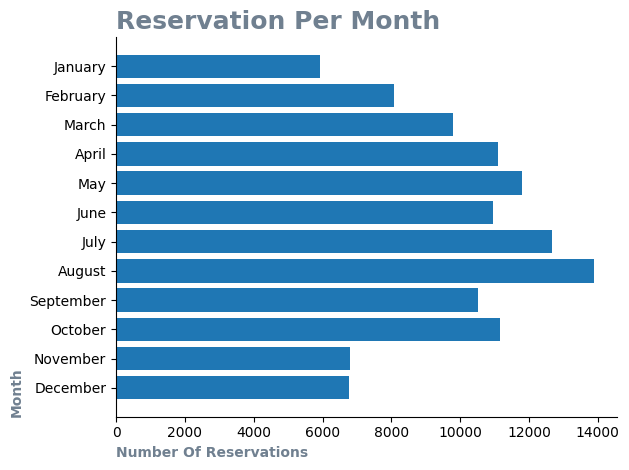

In [25]:
data_monthly = data.groupby(data['arrival_date_month']).size().reset_index()
data_monthly.columns = ['month', 'count']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data_monthly['month'] = pd.Categorical(data_monthly['month'], categories=month_order, ordered=True)
data_monthly = data_monthly.sort_values('month', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()

plt.barh(data_monthly['month'], data_monthly['count'])
plt.title('Reservation Per Month', loc='left', weight="bold", color='slategray', fontsize=18)
plt.xlabel('Number Of Reservations', loc='left', weight="bold", color='slategray')
plt.ylabel('Month', loc='bottom', weight="bold", color='slategray')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

The number of Cancels has a direct relation with the number of reservations. As like reservations, we have increase in the number of cancelled reservations until August and the decreasing pattern.

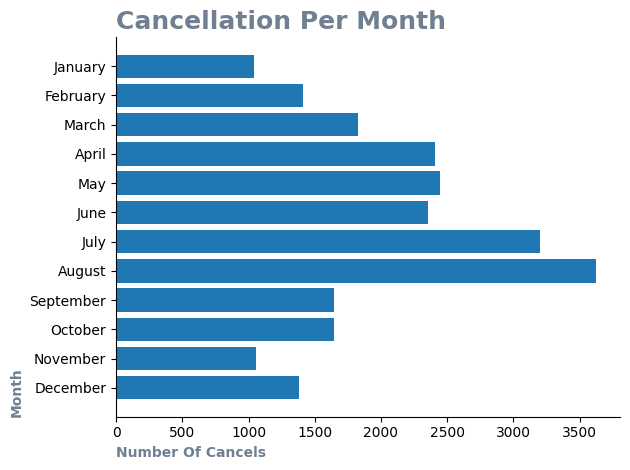

In [18]:
Cancelled_Data = data[data['is_canceled'] == 1]
cancelled_monthly = Cancelled_Data.groupby(Cancelled_Data['arrival_date_month']).size().reset_index()
cancelled_monthly.columns = ['month', 'count']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
cancelled_monthly['month'] = pd.Categorical(cancelled_monthly['month'], categories=month_order, ordered=True)
cancelled_monthly = cancelled_monthly.sort_values('month', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()

plt.barh(cancelled_monthly['month'], cancelled_monthly['count'])
plt.title('Cancellation Per Month', loc='left', weight="bold", color='slategray', fontsize=18)
plt.xlabel('Number Of Cancels', loc='left', weight="bold", color='slategray')
plt.ylabel('Month', loc='bottom', weight="bold", color='slategray')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


## Conclusion

**1. City Hotel seem to be more successful though it has more reservations and more revenue although this hotel has 6.5 percent more cancellation than Resort hotel**

**2. Passengers mostly select the __A__, __D__, __E__ and __F__ types of rooms**

**3. Even though the minimum and mean of prices of two hotels are almost same, the City hotel with having high revenue for some conditions has a significant high amount of revenue in some reservations.**

**4. Portugal, United Kingdom, France, Spain and Germany are the 5 top nationalities between passengers booked rooms.**

**5. Online travel agencies have the greater part of the market in reserving methods.**

**6. From start of the year the number of reservations increase until August. Months July and August are the peak months in numbers of reservations. After August we can see a decreasing pattern. In October there is slight increase in reservation. Number of reservations in November and December are almost same, both less than October.** 